# Tarea Semanal 6: Estimación espectral. Ventanas en acción!
## Magdalena Noé
En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App.

Se trabajara sobre una señal con amplitud y frecuencia variable y se estimara su amplitud y frecuencia intrinseca con 4 tipos de ventanas:
- Rectangular (sin ventana)
- Flattop
- Blackmanharris
- Coseno
### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal import windows

Parametros de la señal
Las variables aleateorias fr y na, correspondientes a la variacion de frecuencia y amplitud correspondientemente, se ven definidas por las siguientes distribuciones de probabilidad:

$$ fr∼U(−2,2);na∼N(0,σ^{2}) $$

In [2]:
fs = 1000       # Frecuencia de muestreo [Hz]
N = fs          # cantidad de muestras

a0 = 2                              #Amplitud señal
sigma = np.sqrt(1/10)               # SNR de 10dB
na = np.random.normal(0, sigma)     #Incertidumbre de amplitud

omega0 = np.pi/2                        #Frecuencia señal [Hz]
fr = np.random.uniform(-2, 2)           #Incertidumbre de frecuencia
omega1 = omega0 + fr*(2*np.pi)    #Frecuencia con incertidumbre


Generacion de señal

In [3]:
k = np.arange(N)                # Array de enteros de 0 a N-1
x = a0 * np.sin(omega1*k) + na  # Señal
'''
x_limpia= a0 * np.sin(omega0*k)
fft_x = np.abs(fft(x))
fft_x_limpia = np.abs(fft(x_limpia))

plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
plt.plot(x, label="X con variacion"); plt.plot(x_limpia, label="X perfecta", linestyle=':'); plt.title("Señal X con variacion de amplitud y frecuencia") 
plt.ylabel("Amplitude"); plt.xlabel("Sample"); plt.xlim(0, 4*(2*np.pi)/omega1); plt.legend(); plt.grid()
plt.subplot(1,2,2)
plt.plot(fft_x, label="X con variacion"); plt.plot(fft_x_limpia, label="X perfecta", linestyle=':', alpha=0.5); plt.title("DFT de señal X"); 
plt.ylabel("Amplitude"); plt.xlabel("Sample"); plt.legend()
plt.show()
'''

'\nx_limpia= a0 * np.sin(omega0*k)\nfft_x = np.abs(fft(x))\nfft_x_limpia = np.abs(fft(x_limpia))\n\nplt.figure(figsize=(18, 4))\nplt.subplot(1,2,1)\nplt.plot(x, label="X con variacion"); plt.plot(x_limpia, label="X perfecta", linestyle=\':\'); plt.title("Señal X con variacion de amplitud y frecuencia") \nplt.ylabel("Amplitude"); plt.xlabel("Sample"); plt.xlim(0, 4*(2*np.pi)/omega1); plt.legend(); plt.grid()\nplt.subplot(1,2,2)\nplt.plot(fft_x, label="X con variacion"); plt.plot(fft_x_limpia, label="X perfecta", linestyle=\':\', alpha=0.5); plt.title("DFT de señal X"); \nplt.ylabel("Amplitude"); plt.xlabel("Sample"); plt.legend()\nplt.show()\n'

Declaracion de las ventanas W

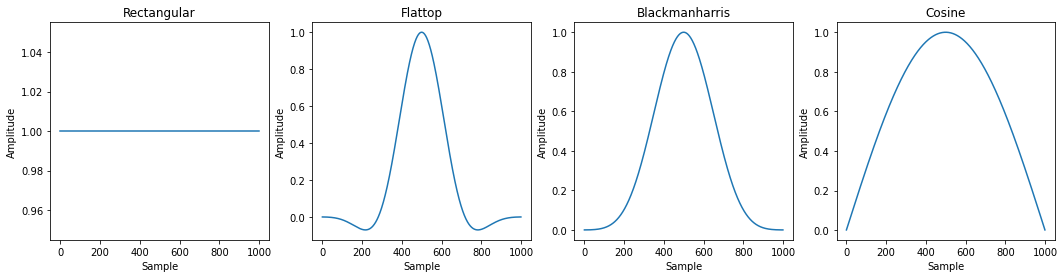

In [4]:
Wrectangular = windows.boxcar(N)                # Arr de 1 constantes, sin ventana
Wflattop = windows.flattop(N)                   # Ventana flattop (sombrero de bruja)
Wblackmanharris = windows.blackmanharris(N)     # Ventana blackmanharris (campana)
Wcosine = windows.cosine(N)                     # Ventana cosine (medio coseno, loma)
arr_W = [Wrectangular, Wflattop, Wblackmanharris, Wcosine]
arr_titulos_W = ["Rectangular", "flattop", "blackmanharris", "cosine"]

# GRAFICOS
plt.figure(figsize=(18, 4))
plt.subplot(1,4,1); plt.plot(Wrectangular); plt.title("Rectangular"); plt.ylabel("Amplitude"); plt.xlabel("Sample")
plt.subplot(1,4,2); plt.plot(Wflattop); plt.title("Flattop"); plt.ylabel("Amplitude"); plt.xlabel("Sample")
plt.subplot(1,4,3); plt.plot(Wblackmanharris); plt.title("Blackmanharris"); plt.ylabel("Amplitude"); plt.xlabel("Sample")
plt.subplot(1,4,4); plt.plot(Wcosine); plt.title("Cosine"); plt.ylabel("Amplitude"); plt.xlabel("Sample")
plt.show()

### Estimamos la amplitud $a_0$ y la frecuencia $ \omega_0 $. 
En ambos analisis se realiz un ventaneo de la señal $X$, por lo que recorreremos los 4 casos de ventanas declaradas anteriormente.

Para estimar la amplitud se realiza la fft de la señal ventaneada y lee el indice correspondiente a $\omega_0 = \pi/2$. A dicha estimacion la llamaremos $a_1$

$$ a^i1=|Xiw(Ω0)|=|F{x(n)⋅wi(n)}| $$

Para estimar la frecuencia se detecta el maximo valor de espectro (fft) y retorna la frecuencia en radianes. A dicha estimacion la llamaremos $Ω_1$

$$ Ω^i1=arg max{|Xiw(Ω)|} $$


In [5]:
def estimar_amplitud(Xw):
    omega0_ind = int(N // 4) # indice de omega0 = pi/2 -> frecuencia fo = fs/4 -> indice = N/4
    return Xw[omega0_ind] # Retorno el valor modulo en pi/2 (pico de señal seno)

def estimar_frecuencia(Xw):
    f_ind = np.argmax(Xw) #Retorna argumento con el maximo pico, que deberia corresponder a la frecuencia fundamental
    omega = 2 * np.pi * f_ind / N # Paso frecuencia a radianes/s
    return omega

def estimar_amp_frec(x,w):
    xw = x * w
    fft_xw = np.array(np.abs(fft(xw)))
    amplitud = estimar_amplitud(fft_xw)
    frecuencia = estimar_frecuencia(fft_xw)
    return amplitud, frecuencia, fft_xw

## Experimentación

Una vez ya declarada la señal, las ventanas a aplicarle y las funciones para obtener una estimacion de amplitud y frecuencia, vamos a correr esta estimacion 200 veces (cant_realizaciones) con 1000 muestras por experimento (N).

La SNR se parametrizara para 3dB, con una alta presencia de ruido, y 10 dB, es decir, con un ruido mas atenuado.
Para los 8 casos (4 ventanas y 2 tipos de SNR) se analizara:
- Sesgo amplitud: diferencia promedio entre valor estimado y el real ($a_0 = 2$)
- Varianza amplitud: cuánto varían las estimaciones de amplitud entre realizaciones
- Sesgo frecuencia: diferencia promedio entre frecuencia estimada y real ($ω0 = π/2$)
- Varianza frecuencia: cuánto se dispersan las estimaciones de frecuencia

In [6]:
cant_realizaciones = 200
SNR_dB = [3, 10]
SNR_lin = [10**(SNR_dB[0]/10), 10**(SNR_dB[1]/10)]

In [ ]:
P_signal = 1
P_noise = P_signal / SNR_lin[0]                         # SNR_lin[0] = 10**(3/10)
sigma = np.sqrt(P_noise)                                # sigma del ruido blanco gaussiano para 1/3dB
na_3dB = np.random.normal(0, sigma, size=(cant_realizaciones,N)) # 200 incertidumbres de amplitud para las 200 realizaciones

P_noise = P_signal / SNR_lin[1]                         # SNR_lin[1] = 10**(10/10)
sigma = np.sqrt(P_noise)                                # sigma del ruido blanco gaussiano para 1/10dB
na_10dB = np.random.normal(0, sigma, size=(cant_realizaciones,N))     # 200 incertidumbres de amplitud para las 200 realizaciones

fr = np.random.uniform(-2, 2, cant_realizaciones)       # 200 incertidumbres de frecuencia para las 200 realizaciones
omega1 = omega0 + fr*(2*np.pi/N)                          #Frecuencias con incertidumbre

omega1 = omega1.reshape((cant_realizaciones, 1))
k = k.reshape((1,N))

x_3dB = a0 * np.sin(omega1*k) + na_3dB                  # 200 señales con variacion con ruido de 3dB
x_10dB = x = a0 * np.sin(omega1*k) + na_10dB            # 200 señales con variacion con ruido de 10dB

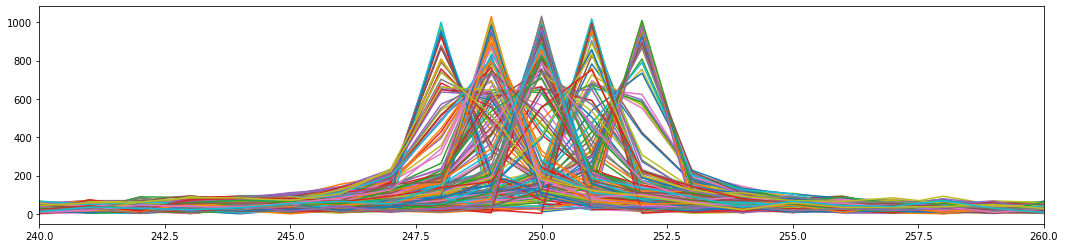

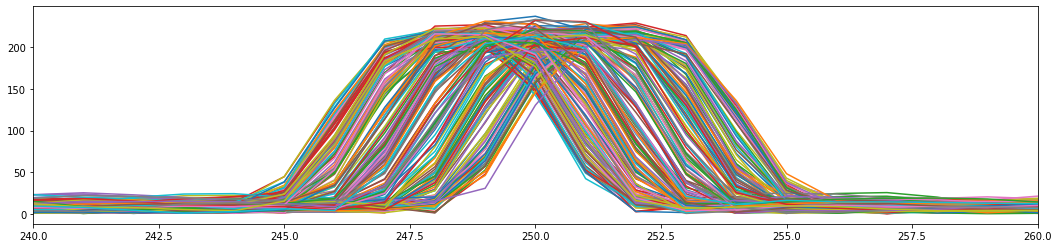

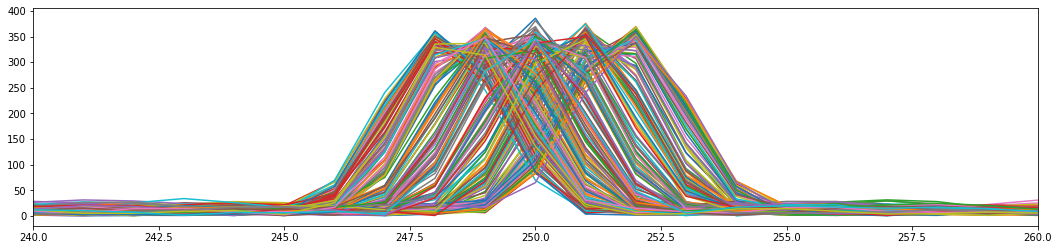

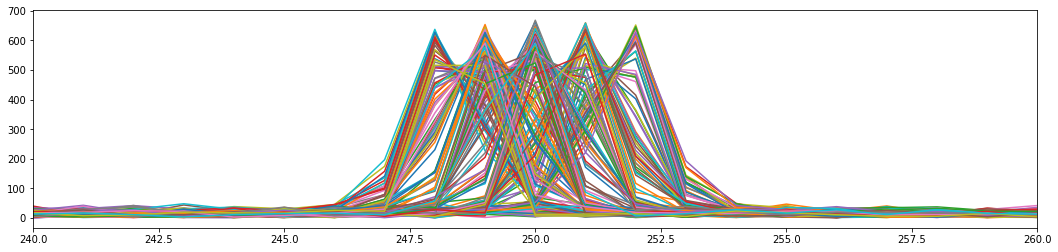

In [14]:
estimaciones_amp = np.zeros((len(arr_W), cant_realizaciones)) # Matriz de 4 filas 200 columnas
estimaciones_freq = np.zeros((len(arr_W), cant_realizaciones))

arr_ffts = np.zeros((len(arr_W), cant_realizaciones, N), dtype=complex)
for j in range(len(arr_W)):
    for i in range(cant_realizaciones):
        x_selec = x_3dB[i]  # señal i de doscientas
        w_selec = arr_W[j]  # Ventana 0 de cuatro, la rectangular (rectangular, flattop, blackmanharris, cosine)
        amplitud, frecuencia, fft_x = estimar_amp_frec(x_selec, w_selec)

        estimaciones_amp[j][i] = amplitud
        estimaciones_freq[j][i] = frecuencia
        arr_ffts[j,i, :] = fft_x

for j in range(len(arr_W)):
    plt.figure(figsize=(18, 4))
    for i in np.arange(cant_realizaciones):
        plt.plot(np.real(arr_ffts[j][i]))
    plt.xlim(240,260)    
    plt.show()

Realizo los siguientes bucles:
- ↳ **SNR (Casos 3dB y 10dB)**
Imprimo 2 tablas separadas con sesgo y varianza dependiendo del SNR indicado

    - ↳ **200 realizaciones** Recalculo variables de amplitud y frecuencia para tener 200 casos diferentes

        - ↳ **4 tipos de ventana** (Aplico c/u de las ventanas a la señal con nuevas variables aleatorias)
        Una vez ventaneado estimo ambos amplitud y frecuencia y guardo estos valores en un array separado para
        cada ventana

In [15]:
#
#   CALCULO DE MEDIA Y VARIANZA E IMPRESION DE TABLA
#
for i in range(4):
    # Sesgo y varianza de amplitud
    mu_amp = np.mean(estimaciones_amp[i])
    sesgo_amp = mu_amp - a0
    varianza_amp = np.mean((estimaciones_amp[i] - mu_amp)**2)

    # Sesgo y varianza de frecuencia
    mu_freq = np.mean(estimaciones_freq[i])
    sesgo_freq = mu_freq - omega0
    varianza_freq = np.mean((estimaciones_freq[i] - mu_freq)**2)

    print(f"[SNR {snr:.3f} - ventana {arr_titulos_W[i]}]")
    print(f"Sesgo amplitud: {sesgo_amp:.2f}, Varianza amplitud: {varianza_amp:.3f}")
    print(f"Sesgo frecuencia: {sesgo_freq/np.pi:.2f} π, Varianza frecuencia: {varianza_freq:.3f}")
    print("--------")

    plt.figure(figsize=(18, 4))
    plt.subplot(1,2,1)
    plt.hist(estimaciones_amp[i], 10); plt.title("Distribución media de est. de amplitud"); plt.xlabel("Valor amplitud"); plt.ylabel("Cant. samples")
    plt.subplot(1,2,2)
    plt.hist(estimaciones_freq[i], 10); plt.title("Distribución media de est. de frecuencia"); plt.xlabel("Valor frecuencia"); plt.ylabel("Cant. samples")
    plt.show()

NameError: name 'snr' is not defined

## Bonus
- 💎 Analice el efecto del zero-padding para el estimador Ω^1
 
- 🤯 Proponga estimadores alternativos para frecuencia y amplitud de la senoidal y repita el experimento.

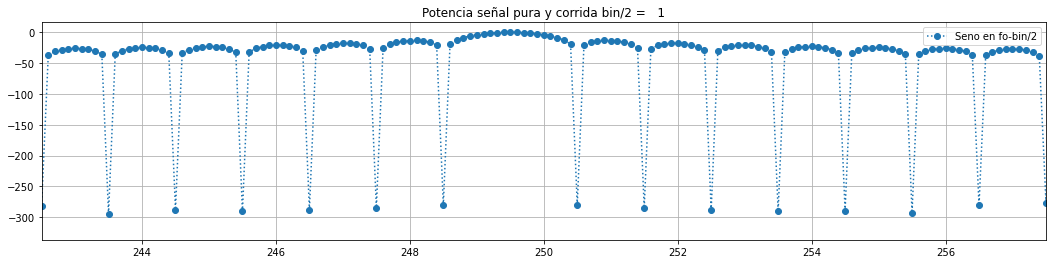

In [ ]:
fs = 1000       # Frecuencia de muestreo [Hz]
N = fs          # cantidad de muestras
fo = fs/4       # [Hz]

Vmax = np.sqrt(2) #[Volts]
df = fs/N # resolución espectral

bin = fs/N

tt = np.arange(N) / fs
s_puro = Vmax * np.sin(tt*2*np.pi*fo)
s_var = Vmax * np.sin(tt*2*np.pi*(fo-(bin/2)))
sen_arr = 0
for i in range(20):
    sen_arr += Vmax * np.sin(tt*2*np.pi*(fo-(i*bin/2)))

s_var = np.concatenate((np.zeros(N*9), s_var))
ff = np.arange(0,fs,df/10) # 10 porque aumente por 10 el N
#ff = np.arange(0,fs,df)
fft_s = fft(s_puro) / N
fft_svar = fft(s_var) / N
fft_arr = fft(sen_arr) / N

plt.figure(figsize=(18, 4))
#plt.plot(ff, 20*np.log10(np.abs(fft_s)*np.sqrt(2)), ':x', label='Seno en fo',)
plt.plot(ff, 20*np.log10(np.abs(fft_svar)*np.sqrt(2)), ':o', label='Seno en fo-bin/2')
#plt.plot(ff, 20*np.log10(np.abs(fft_arr)*np.sqrt(2)), label='Sen arr')
plt.legend(); plt.xlim(fo*0.97,fo*1.03);plt.grid();plt.title("Potencia señal pura y corrida bin/2 = {:3.0f}".format(bin))
plt.show()